In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import zipfile
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!unzip '/content/drive/MyDrive/data_set/Celebrity_pics.zip' -d extracted_files

Archive:  /content/drive/MyDrive/data_set/Celebrity_pics.zip
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN29.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN13.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN12.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN14.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN15.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN25.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN20.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN17.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN16.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN32.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN24.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN38.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN26.jpg  
  inflating: extracted_files/Celebrity_pics/Nayan_Thara/NN28.jpg  
 

In [ ]:
img=cv2.imread('extracted_files/Celebrity_pics/Fahad_Fazil/desktop-wallpaper-fahadh-faasil-cool-and-fahadh-faasil.jpg')

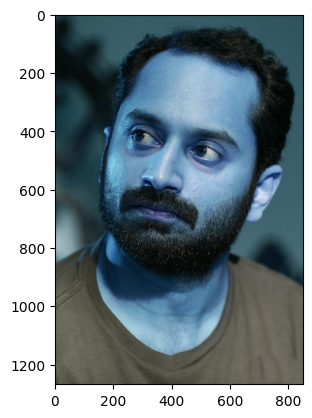

In [ ]:
plt.imshow(img)


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1268, 850)

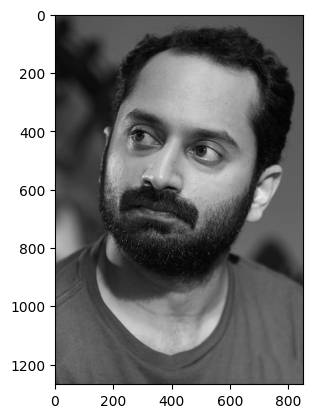

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

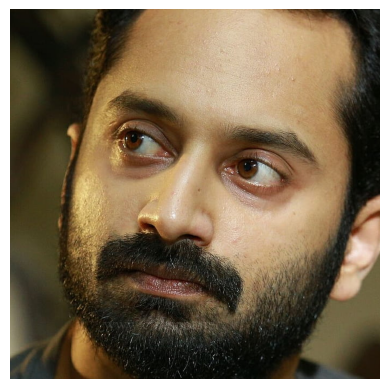

In [ ]:
# Load the image
image = cv2.imread('extracted_files/Celebrity_pics/Fahad_Fazil/desktop-wallpaper-fahadh-faasil-cool-and-fahadh-faasil.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
face = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces
for (x, y, w, h) in face:
    # Crop the face from the image
    face = image[y:y+h, x:x+w]

    # Detect eyes within the face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
        # Display the cropped face where both eyes are visible.
      plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.show()

In [ ]:
path_to_data = "extracted_files/Celebrity_pics"
path_to_cr_data = "/content/drive/MyDrive/data_set/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['extracted_files/Celebrity_pics/Ryan_Gossling',
 'extracted_files/Celebrity_pics/Fahad_Fazil',
 'extracted_files/Celebrity_pics/Sharukh_Khan',
 'extracted_files/Celebrity_pics/Alia_Bhutt',
 'extracted_files/Celebrity_pics/Manju_Varrier',
 'extracted_files/Celebrity_pics/Nayan_Thara']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Sharukh_Khan
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Alia_Bhutt
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Manju_Varrier
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Ryan_Gossling
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Nayan_Thara
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Fahad_Fazil


##**Feature Extraction**

In [ ]:
import pywt


def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

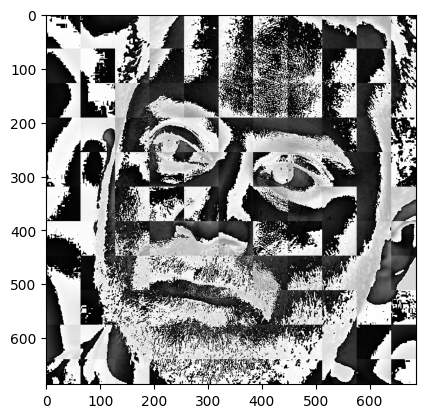

In [ ]:
im_har = w2d(face,'haar',6)
plt.imshow(im_har, cmap='gray')

In [ ]:
!pip install Pillow

In [ ]:
cropped_image_dirs=['/content/drive/MyDrive/data_set/cropped/Sharukh_Khan',
                    '/content/drive/MyDrive/data_set/cropped/Alia_Bhutt',
                    '/content/drive/MyDrive/data_set/cropped/Manju_Varrier',
                    '/content/drive/MyDrive/data_set/cropped/Ryan_Gossling',
                    '/content/drive/MyDrive/data_set/cropped/Nayan_Thara',
                    '/content/drive/MyDrive/data_set/cropped/Fahad_Fazil']

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Sharukh_Khan': ['/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan2.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan3.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan4.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan6.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan7.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan8.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan9.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan10.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan11.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan12.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan13.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Khan14.jpg',
  '/content/drive/MyDrive/data_set/cropped/Sharukh_Khan/Sharukh_Kha

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Sharukh_Khan': 0,
 'Alia_Bhutt': 1,
 'Manju_Varrier': 2,
 'Ryan_Gossling': 3,
 'Nayan_Thara': 4,
 'Fahad_Fazil': 5}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
type(X)

list

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(210, 4096)

In [ ]:
X

array([[  5.,  15.,   0., ...,  43., 219., 233.],
       [ 41.,  10.,  29., ...,  47., 253., 251.],
       [  0.,   2.,   0., ...,  17.,   5.,   5.],
       ...,
       [ 31.,  35.,  45., ...,  38., 254., 247.],
       [ 86.,  50.,  14., ..., 121.,  50.,  17.],
       [ 46.,  91.,  43., ..., 199.,  36.,   5.]])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6792452830188679

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.55      0.86      0.67         7
           2       0.67      0.55      0.60        11
           3       1.00      0.90      0.95        10
           4       0.80      0.50      0.62         8
           5       0.50      0.86      0.63         7

    accuracy                           0.68        53
   macro avg       0.70      0.69      0.67        53
weighted avg       0.72      0.68      0.68        53



In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
X,y=[],[]
for celeb, images in celebrity_file_names_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img, (128, 128))  # Resize the image
        nor_img = resized_img / 255.0  # Normalize the resized image
        X.append(nor_img)
        y.append(class_dict[celeb])

In [ ]:
type(X)

list

In [ ]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

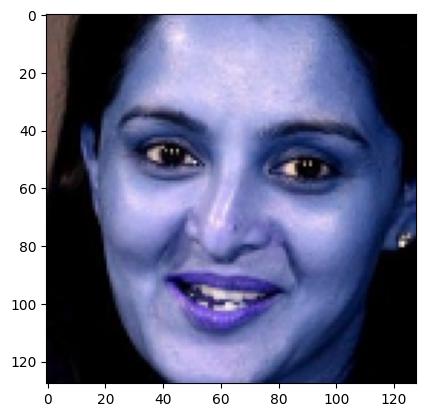

In [ ]:
plt.imshow(X[47])

In [ ]:
y[47]

2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_stacked = np.stack(X_train)
X_reshaped = X_stacked.reshape(-1, 128, 128, 3)
X_train = X_reshaped.astype('float32')

In [ ]:
X_train.shape

(157, 128, 128, 3)

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=100, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=200, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.fit(X_train, y_train, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 2/150
5/5 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 3/150
5/5 [==============================] - 0s 67ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 4/150
5/5 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 5/150
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 6/150
5/5 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 7/150
5/5 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 8/150
5/5 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 9/150
5/5 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 0.1465
Epoch 10/150
5/5 [==============================] - 0s 61ms/step - loss: 0.0000e+0